# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [66]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [68]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/drive/MyDrive/Upgrad Data science and AI /Machine Learning /Linear Regression Assignment/porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [70]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [72]:
# Convert categorical features to category type
categorical_features = ['market_id', 'store_primary_category', 'order_protocol']
df[categorical_features] = df[categorical_features].astype('category')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  category      
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [74]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df['time_taken']

0         47.0
1         44.0
2         55.0
3         59.0
4         46.0
          ... 
175772    43.0
175773    62.0
175774    46.0
175775    45.0
175776    37.0
Name: time_taken, Length: 175777, dtype: float64

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [75]:
# Extract the hour and day of week from the 'created_at' timestamp
# Hour
df['hour'] = df['created_at'].dt.hour
# Day of week
df['day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [76]:
# Drop unnecessary columns
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)
df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  hour  \
0                14.0                      21.0     34.44        47.0    22   
1                 2.0                       2.0     27.60        44.0    21   
2                 6.0                      18.0     11.56        55.0     0   
3                 6.0                       8.0     31.80        59.0     3   
4                 5.0                       7.0      8.20        46.0     2   

   day_of_week  isWeekend  
0            4          0  
1            1          0  
2            0          0  
3            3          0  
4            1          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [77]:
# Define target variable (y) and features (X)
  # Target variable
y = df['time_taken']
  # Input features
X = df.drop('time_taken', axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [78]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0            1       820   
94576        4.0                     20            3.0            1       995   
49784        1.0                     36            3.0            4      2040   
37753        3.0                     39            1.0            2      2376   
91728        2.0                      6            1.0            1      1430   

        num_distinct_items  min_item_price  max_item_price  \
102712                   1             745             745   
94576                    1             995             995   
49784                    4             150             895   
37753                    2             579            1399   
91728                    1            1320            1320   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
102712                   35.0                39.0                      56.0   
94576                   110.0                72.0                     116.0   
49784                     6.0                 3.0                       7.0   
37753                    16.0                17.0                      19.0   
91728                    64.0                47.0                      52.0   

        distance  hour  day_of_week  isWeekend  
102712     30.32    21            1          0  
94576      31.16     2            4          0  
49784      18.16    21            4          0  
37753      33.44     3            1          0  
91728      31.56    21            4          0

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [80]:
# Define numerical and categorical columns for easy EDA and data manipulation
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['category'])

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [81]:
df_num.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'isWeekend'],
      dtype='object')

In [82]:
# to find null values
df.isnull().sum()

market_id                   0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
time_taken                  0
hour                        0
day_of_week                 0
isWeekend                   0
dtype: int64

In [83]:
df_cat.columns

Index(['market_id', 'store_primary_category', 'order_protocol'], dtype='object')

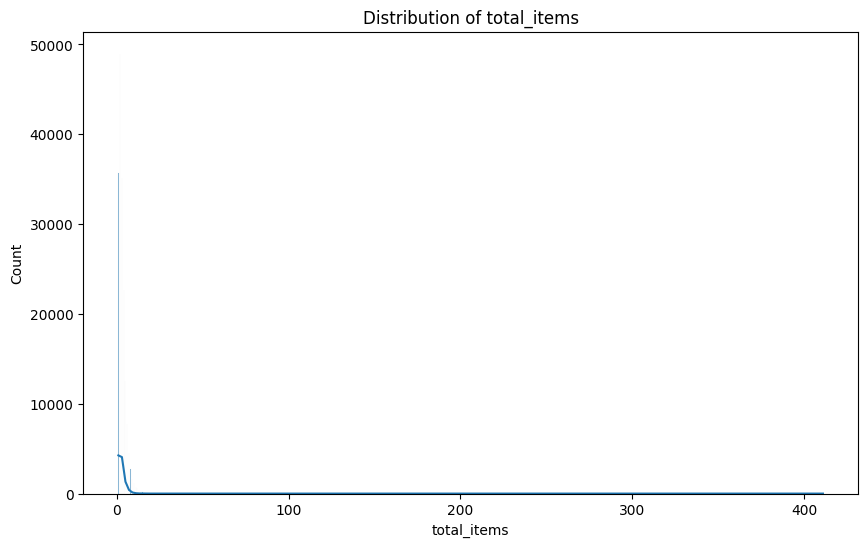

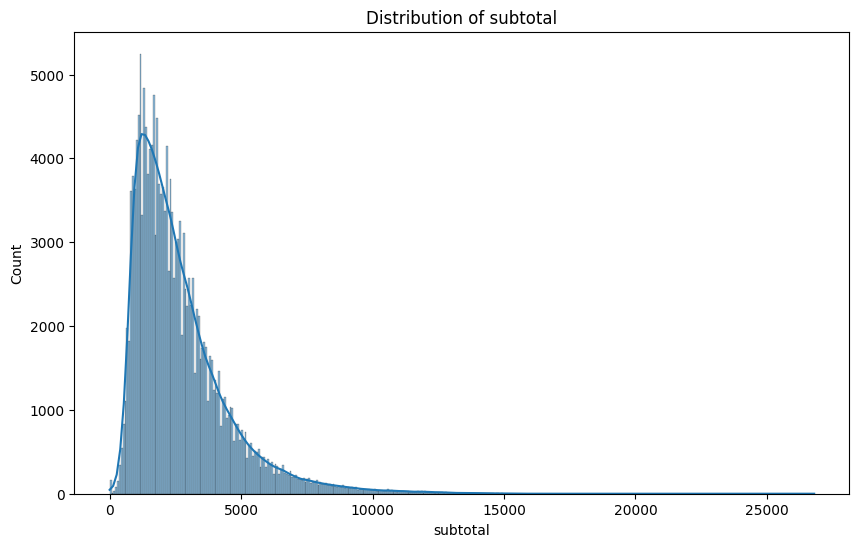

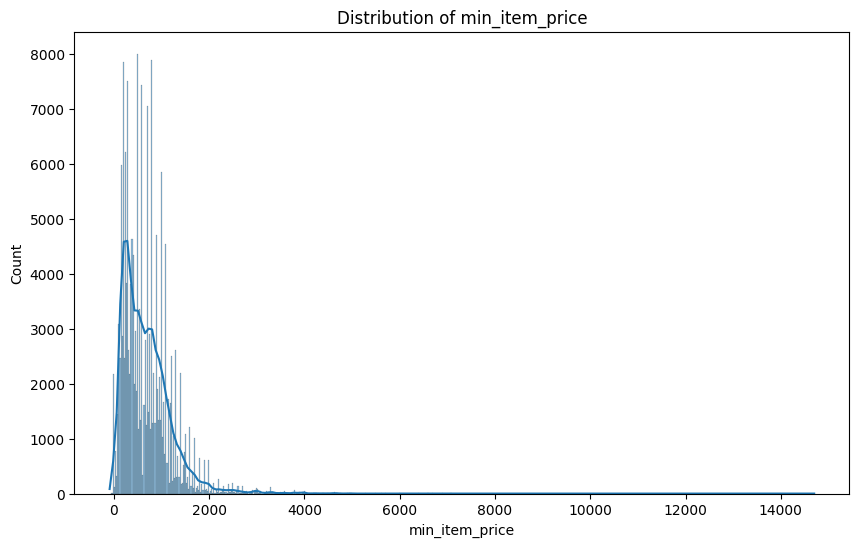

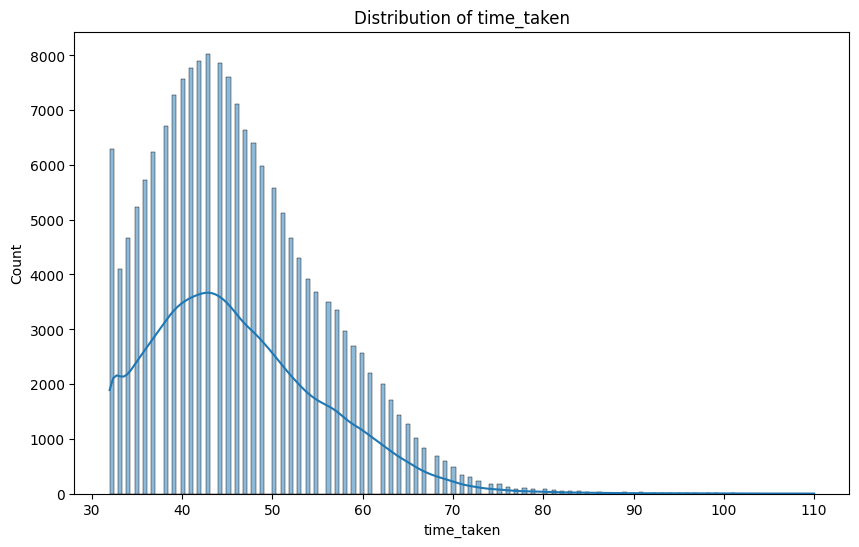

In [84]:
# Plot distributions for all numerical columns
for col in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_num[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

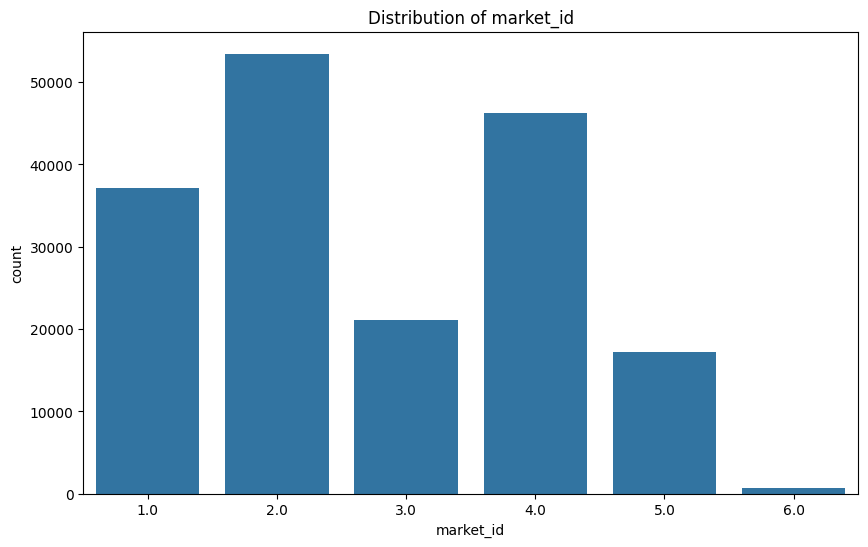

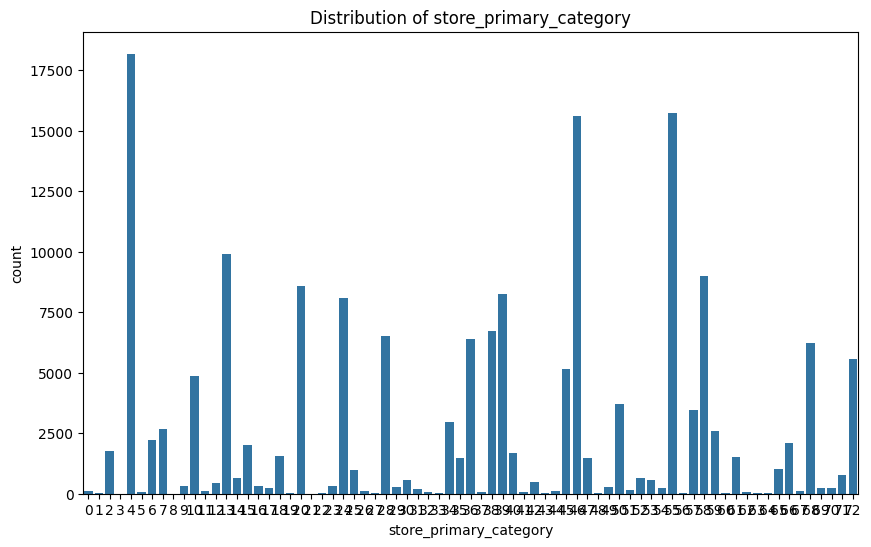

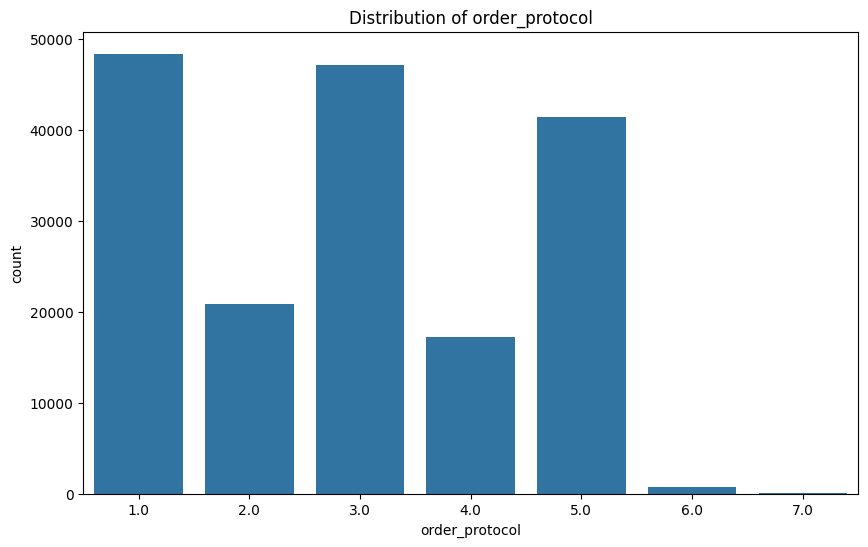

In [85]:
# Distribution of categorical columns
for col in df_cat.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df_cat[col])
    plt.title(f'Distribution of {col}')
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

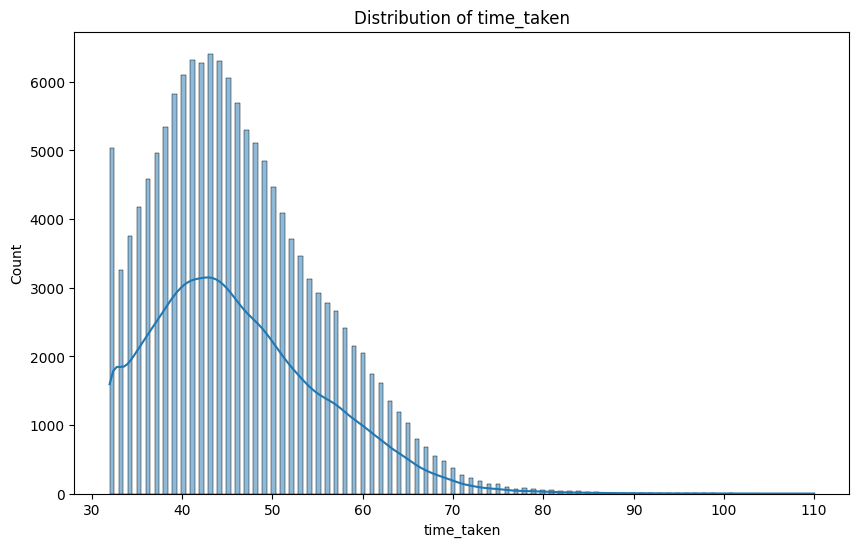

In [86]:
# Distribution of time_taken
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of time_taken')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [87]:
df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  hour  \
0                14.0                      21.0     34.44        47.0    22   
1                 2.0                       2.0     27.60        44.0    21   
2                 6.0                      18.0     11.56        55.0     0   
3                 6.0                       8.0     31.80        59.0     3   
4                 5.0                       7.0      8.20        46.0     2   

   day_of_week  isWeekend  
0            4          0  
1            1          0  
2            0          0  
3            3          0  
4            1          0

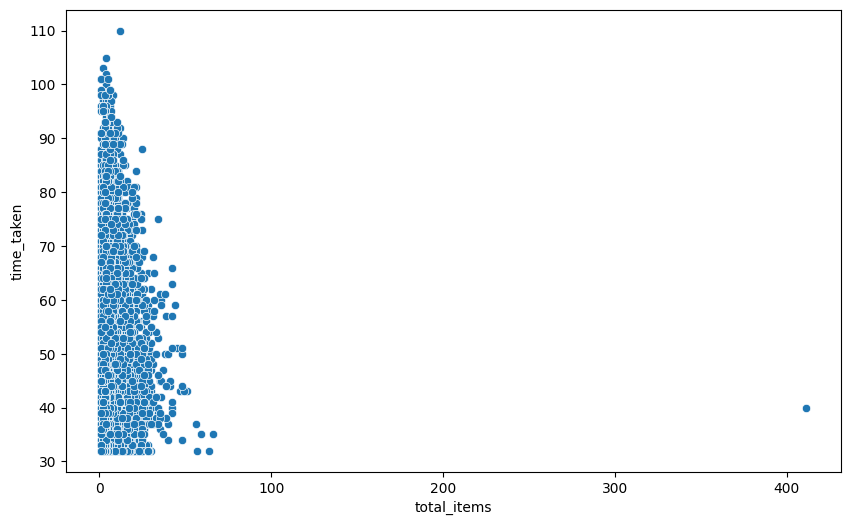

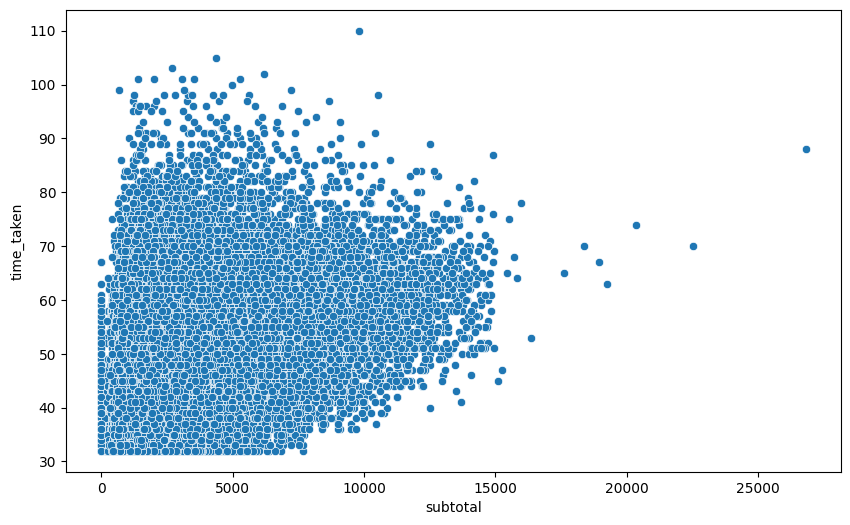

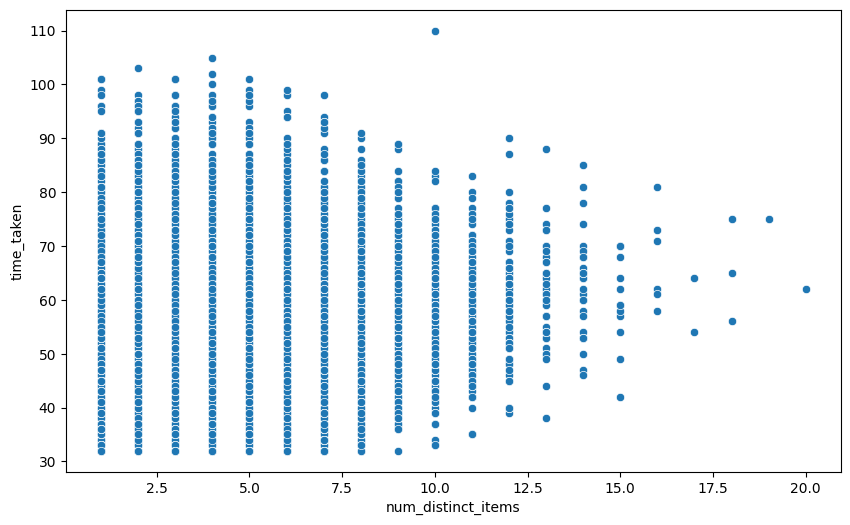

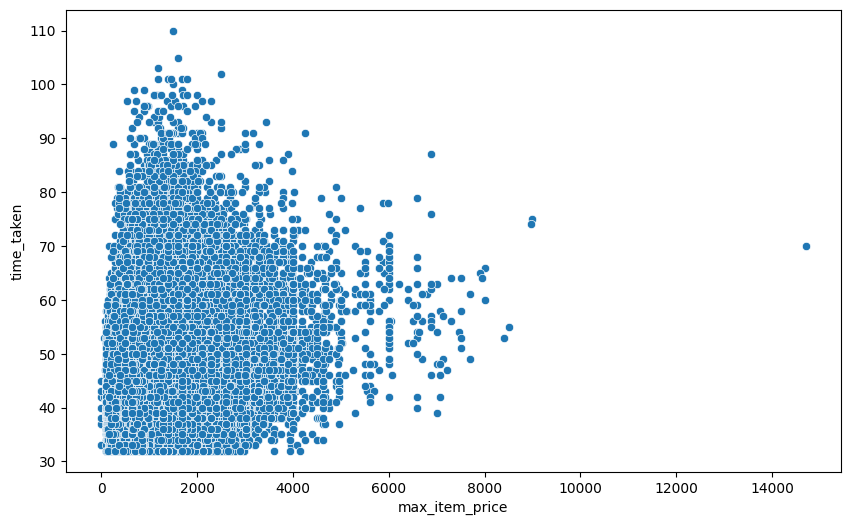

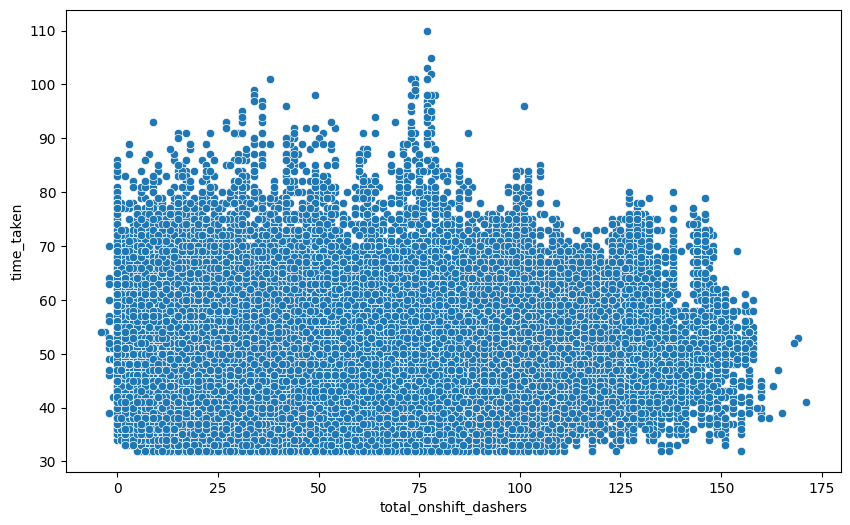

In [88]:
# Scatter plot to visualise the relationship between time_taken and other features
for col in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='time_taken', data=df)

In [89]:
for col in df_cat.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='time_taken', data=df)

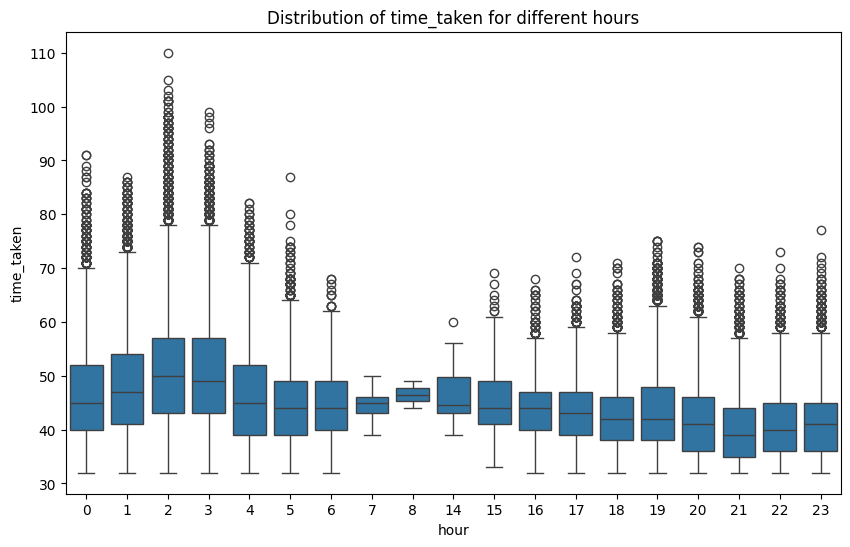

In [90]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='time_taken', data=df)
plt.title('Distribution of time_taken for different hours')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [91]:
# Plot the heatmap of the correlation matrix
# Calculate the correlation matrix
corr_matrix = df.corr()
# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [92]:
df.columns

Index(['market_id', 'store_primary_category', 'order_protocol', 'total_items',
       'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'time_taken', 'hour',
       'day_of_week', 'isWeekend'],
      dtype='object')

In [93]:
# Drop 3-5 weakly correlated columns from training dataset
df.drop(['market_id', 'store_primary_category', 'order_protocol', 'min_item_price', 'day_of_week'], axis=1, inplace=True)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [94]:
X_train.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0            1       820   
94576        4.0                     20            3.0            1       995   
49784        1.0                     36            3.0            4      2040   
37753        3.0                     39            1.0            2      2376   
91728        2.0                      6            1.0            1      1430   

        num_distinct_items  min_item_price  max_item_price  \
102712                   1             745             745   
94576                    1             995             995   
49784                    4             150             895   
37753                    2             579            1399   
91728                    1            1320            1320   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
102712                   35.0                39.0                      56.0   
94576                   110.0                72.0                     116.0   
49784                     6.0                 3.0                       7.0   
37753                    16.0                17.0                      19.0   
91728                    64.0                47.0                      52.0   

        distance  hour  day_of_week  isWeekend  
102712     30.32    21            1          0  
94576      31.16     2            4          0  
49784      18.16    21            4          0  
37753      33.44     3            1          0  
91728      31.56    21            4          0

In [95]:
y_train.head()

102712    45.0
94576     43.0
49784     46.0
37753     51.0
91728     37.0
Name: time_taken, dtype: float64

In [96]:
# Boxplot for time_taken
plt.figure(figsize=(10, 6))
sns.boxplot(y=y_train)
plt.title('Boxplot for time_taken')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [97]:
# Handle outliers
# Calculate the IQR for time_taken
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

In [98]:
Q1

np.float64(39.0)

In [99]:
Q3

np.float64(52.0)

In [100]:
IQR

np.float64(13.0)

In [101]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [102]:
lower_bound

np.float64(19.5)

In [103]:
upper_bound

np.float64(71.5)

In [104]:
# Remove outliers from the training data
X_train_cleaned = X_train[(y_train >= lower_bound) & (y_train <= upper_bound)]
y_train_cleaned = y_train[(y_train >= lower_bound) & (y_train <= upper_bound)]

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [105]:
# Define numerical and categorical columns for easy EDA and data manipulation
df1_num = X_test.select_dtypes(include=['int64', 'float64'])
df1_cat = X_test.select_dtypes(include=['category'])

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

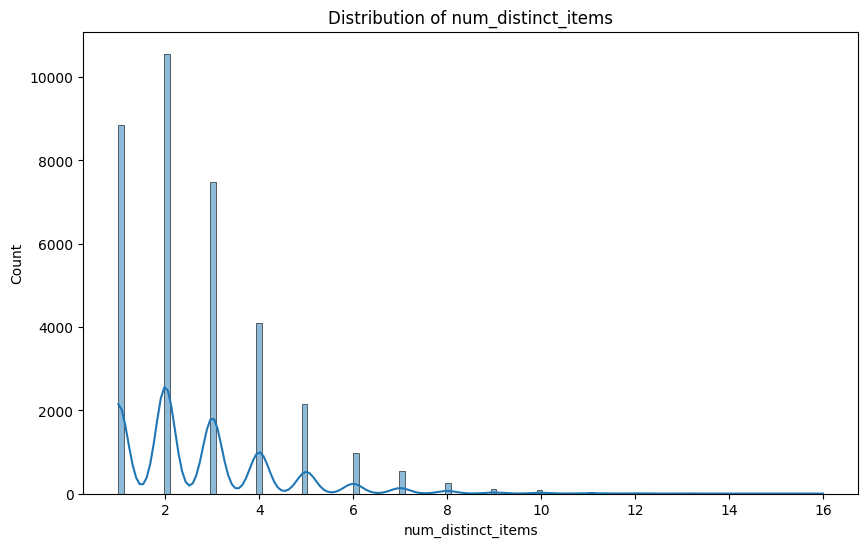

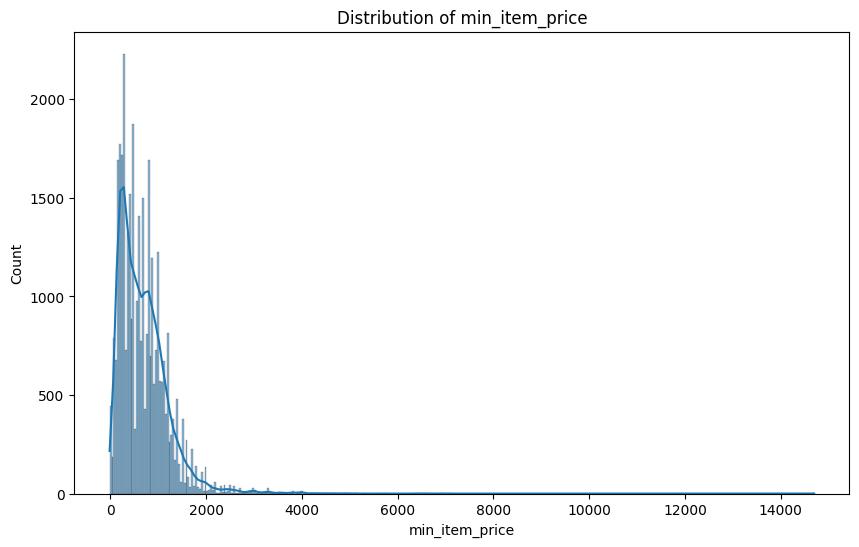

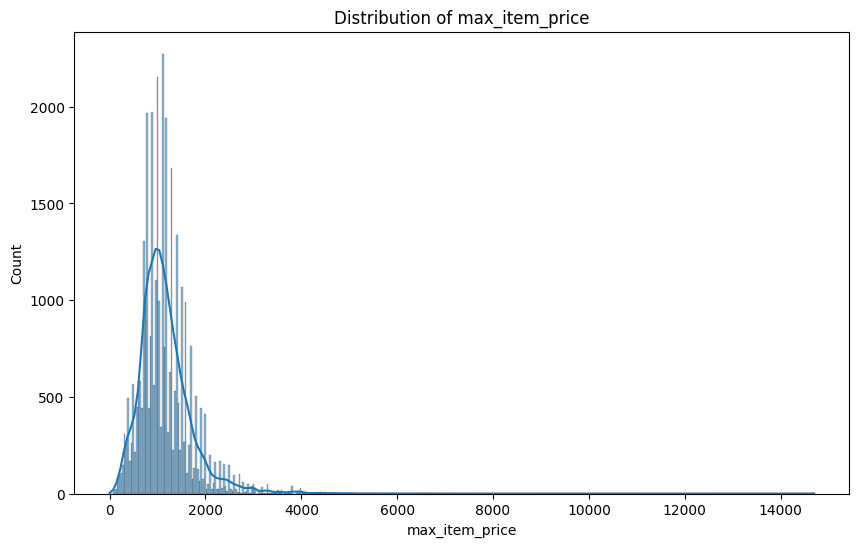

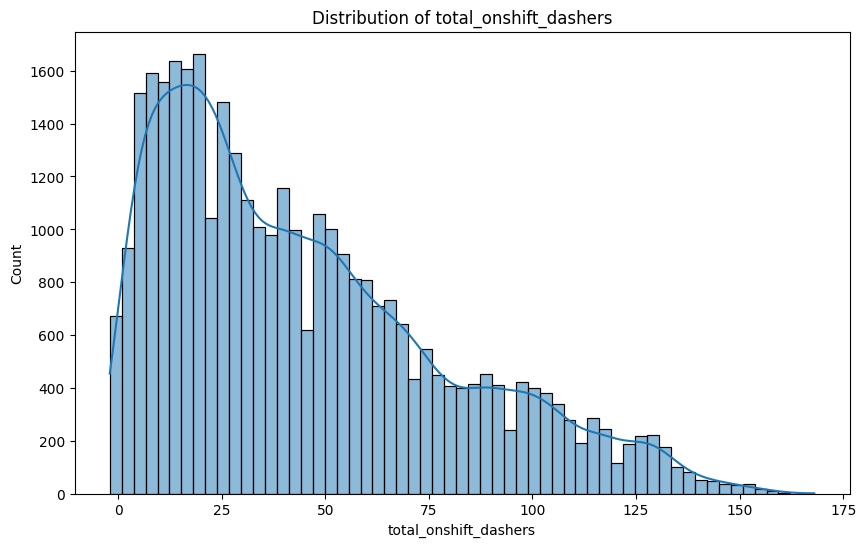

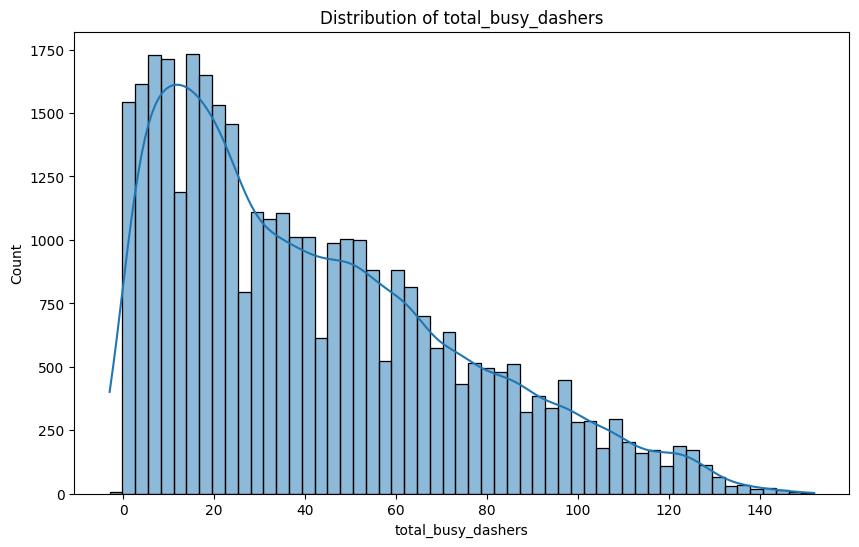

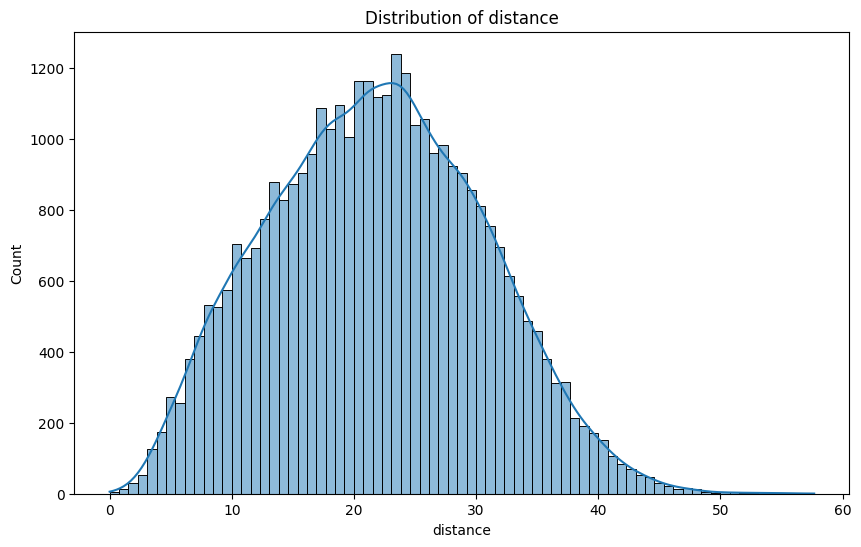

In [106]:
# Plot distributions for all numerical columns
for col in df1_num.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_test[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

##### **4.1.2**
Check the distribution of categorical features

In [107]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [108]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [109]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [110]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [111]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [112]:
df_num.head()

total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            4      4771                   3             820            1604   
3            1      1525                   1            1525            1525   
4            2      3620                   2            1425            2195   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   33.0                14.0                      21.0   
1                    1.0                 2.0                       2.0   
2                    8.0                 6.0                      18.0   
3                    5.0                 6.0                       8.0   
4                    5.0                 5.0                       7.0   

   distance  time_taken  isWeekend  
0     34.44        47.0          0  
1     27.60        44.0          0  
2     11.56        55.0          0  
3     31.80        59.0          0  
4      8.20        46.0          0

In [113]:
# Apply scaling to the numerical columns
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [114]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [115]:
# Create/Initialise the model
lm = LinearRegression()

In [116]:
# Train the model using the training data
lm.fit(X_train_scaled, y_train_cleaned)

LinearRegression()

In [117]:
# Make predictions
y_train_pred = lm.predict(X_train_scaled)
y_test_pred = lm.predict(X_test_scaled)

In [118]:
y_train_pred

array([47.43378727, 40.27812601, 43.08725342, ..., 40.76444015,
       49.27263151, 40.54178345])

In [119]:
# Find results for evaluation metrics
train_mse = mean_squared_error(y_train_cleaned, y_train_pred)
train_mae = mean_absolute_error(y_train_cleaned, y_train_pred)

In [120]:
train_mae

2.2427009629443226

In [121]:
train_mse

9.025303609004041

In [122]:
y_train_pred

array([47.43378727, 40.27812601, 43.08725342, ..., 40.76444015,
       49.27263151, 40.54178345])

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [123]:
X_train_scaled

array([[0.2       , 0.625     , 0.16666667, ..., 0.91304348, 0.16666667,
        0.        ],
       [0.6       , 0.27777778, 0.33333333, ..., 0.08695652, 0.66666667,
        0.        ],
       [0.        , 0.5       , 0.33333333, ..., 0.91304348, 0.66666667,
        0.        ],
       ...,
       [1.        , 0.63888889, 0.66666667, ..., 0.04347826, 0.16666667,
        0.        ],
       [0.8       , 0.5       , 0.16666667, ..., 0.13043478, 0.83333333,
        1.        ],
       [0.        , 0.76388889, 0.33333333, ..., 0.13043478, 0.        ,
        0.        ]])

In [124]:
# Loop through the number of features and test the model
for num_features in range(1, X_train_scaled.shape[1] + 1):
    rfe = RFE(lm, n_features_to_select=num_features)
    rfe.fit(X_train_scaled, y_train_cleaned)
    X_train_rfe = rfe.transform(X_train_scaled)
    X_test_rfe = rfe.transform(X_test_scaled)
    lm.fit(X_train_rfe, y_train_cleaned)
    y_train_pred = lm.predict(X_train_rfe)
    y_test_pred = lm.predict(X_test_rfe)
    train_mse = mean_squared_error(y_train_cleaned, y_train_pred)
    train_mae = mean_absolute_error(y_train_cleaned, y_train_pred)
    print(f"Number of features: {num_features}, Train MSE: {train_mse}, Train MAE: {train_mae}")

Number of features: 1, Train MSE: 66.65380545002137, Train MAE: 6.654459738229995
Number of features: 2, Train MSE: 45.28556368910319, Train MAE: 5.374627077879909
Number of features: 3, Train MSE: 33.798355042612805, Train MAE: 4.612898663438082
Number of features: 4, Train MSE: 17.194360934264274, Train MAE: 3.2162273144830618
Number of features: 5, Train MSE: 15.272639688336703, Train MAE: 3.0581526728605213
Number of features: 6, Train MSE: 15.270042337357584, Train MAE: 3.058211876096316
Number of features: 7, Train MSE: 15.06460503961679, Train MAE: 3.040944836015738
Number of features: 8, Train MSE: 14.775351652466643, Train MAE: 3.0073936851352325
Number of features: 9, Train MSE: 10.992572025420436, Train MAE: 2.48429673313513
Number of features: 10, Train MSE: 10.01689448741289, Train MAE: 2.361366502084457
Number of features: 11, Train MSE: 9.470198848825255, Train MAE: 2.3198592589946596
Number of features: 12, Train MSE: 9.464894859428265, Train MAE: 2.3193910618966824
Num

In [125]:
# Build the final model with selected number of features
rfe = RFE(lm, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train_cleaned)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [129]:
# Get the boolean mask of selected features
selected_features_mask = rfe.support_

# Get the names of the original features
original_features = X_train.columns

# Use the mask to select the names of the chosen features
selected_feature_names = original_features[selected_features_mask]

print("Selected features by RFE:")
print(selected_feature_names)

Selected features by RFE:
Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')


In [130]:
list(zip(selected_feature_names,rfe.support_,rfe.ranking_))

[('total_items', np.False_, np.int64(4)),
 ('subtotal', np.False_, np.int64(7)),
 ('num_distinct_items', np.False_, np.int64(3)),
 ('max_item_price', np.True_, np.int64(1)),
 ('total_onshift_dashers', np.True_, np.int64(1)),
 ('total_busy_dashers', np.True_, np.int64(1)),
 ('total_outstanding_orders', np.False_, np.int64(5)),
 ('distance', np.True_, np.int64(1))]

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

Text(0.5, 1.0, 'Residuals vs Predicted Values')

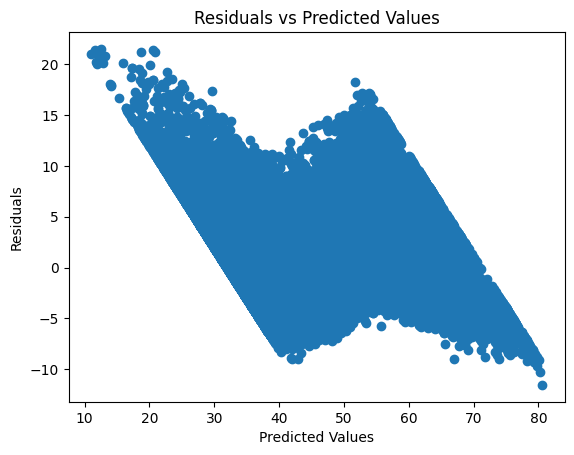

In [126]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
# Residuals vs Predicted Values
residuals = y_train_cleaned - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [127]:
# Compare the scaled vs unscaled features used in the final model


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [128]:
# Analyze the effect of a unit change in a feature, say 'total_items'


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Based on the correlation analysis performed in the notebook, these specific categorical variables (market_id,store_primary_category,order_protocol) showed weak linear relationships with the target variable 'time_taken'.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>It means that 80% of the data will be used for the training set. 20% of the data will be used for the testing set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> As per the given data 'Distance' has the highest correlation with 'time_taken'.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> I used IQR method to find out the lower and upper bound after that I removed the data which is below then lower bound and above then upper bound.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> '**total_onshift_dashers**','**total_busy_dashers**','**distance**' - These 3 are the most important feature as per the model. Because in rfe ranking these are having 1 rank.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> The goal of linear regression is to model the relationship between a dependent variable (the target, often denoted as 'y') and one or more independent variables (the features, often denoted as 'x') by fitting a linear equation to the observed data. The equation represents the best-fitting line (or hyperplane in the case of multiple features) that minimizes the difference between the predicted values and the actual values.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> The fundamental difference between simple linear regression and multiple linear regression lies in the number of independent variables (features) used to predict the dependent variable (target). SLR used to predict one variable and in MLR used to predict more then one variable.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> In linear regression, the cost function (or loss function) plays a crucial role as a measure of the model's performance. Its primary purpose is to quantify the discrepancy between the model's predictions and the actual observed values of the target variable.

Here's a breakdown of its role and how it's minimized:

Role of the Cost Function:

Quantifying Error: The cost function provides a single numerical value that represents the total error of the model for a given set of coefficients. A higher cost indicates a worse fit (larger errors), while a lower cost indicates a better fit (smaller errors).

Guiding the Optimization Process: The cost function serves as a guide for the optimization algorithm (like Ordinary Least Squares or Gradient Descent) to find the optimal set of coefficients. The algorithm's goal is to iteratively adjust the coefficients in a way that minimizes this cost function.

Evaluating Model Performance: By calculating the cost function (or related metrics derived from it, like MSE or RMSE) on both the training and testing data, we can evaluate how well the model is performing and whether it's overfitting or underfitting.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting happens when a model learns the training data too well. It captures not only the underlying patterns but also the noise and random fluctuations specific to the training set.

> Underfitting happens when a model is too simple to capture the underlying patterns in the data. It fails to learn the relationships between the features and the target variable, even in the training data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?



```
# This is formatted as code
```

**Answer:**
> Residual plots are powerful diagnostic tools for evaluating the assumptions of a linear regression model and identifying potential problems. Residuals, as you know, are the differences between the actual observed values and the predicted values from the model.